# STATIONARITY TESTS

Applying some stationarity tests for some cases

In [1]:
from __future__ import print_function, division

import numpy as np

from scipy.io import loadmat
from joblib import dump, Parallel, delayed
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from arch.unitroot import PhillipsPerron

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition, mark_inset

In [2]:
# load data
def load_data(filename):
    # load dataset
    exames_dict = loadmat(filename)
    
    target = exames_dict['target']
    exames = exames_dict['exames']

    # samples as the first dimension
    exames = np.transpose(exames,(2,0,1))

    target = target[0]
    return exames, target

In [3]:
# STARTING ANALYSIS

exams_path = "/home/pedrosergiot/Documents/Exames2_sem1segundo.mat"
exames, target = load_data(exams_path)

print(exames.shape)

(288, 5504, 19)


In [4]:
X = exames[0,0:64,0]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.920419
p-value: 0.000032
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


# ANALYSIS USING WINDOWS MULTIPLE OF 64 POINTS

# Augmented Dicken-Fuller Test

Rejecting the null hypothesis means series has no unit root (which is the same as be stationary). Test dividing the complete signal into windows (starting with 64 points and doubling the value each iteration) and checking the stationarity for each window

In [143]:
def adf_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = adfuller(exam[:,channel])
                
        if result[0] < result[4]['1%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_ADF = Parallel(n_jobs=6)(delayed(adf_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_ADF
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_ADF_winsize_001')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [6]:
def adf_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = adfuller(exam[:,channel])
                
        if result[0] < result[4]['5%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_ADF = Parallel(n_jobs=6)(delayed(adf_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_ADF
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_ADF_winsize005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Phillips-Perron Test

Rejecting the null hypothesis means the series has no unit root (which is the same as being stationary). Test dividing the complete signal into windows (starting with 64 points and doubling the value each iteration) and checking the stationarity for each window

In [109]:
def pp_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = PhillipsPerron(exam[:,channel])
                
        if result.stat < result.critical_values['1%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_PP = Parallel(n_jobs=6)(delayed(pp_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_PP
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_PP_winsize')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [7]:
def pp_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = PhillipsPerron(exam[:,channel])
                
        if result.stat < result.critical_values['5%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_PP = Parallel(n_jobs=6)(delayed(pp_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_PP
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_PP_winsize005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Kwiatkowski-Phillips-Schmidt-Shin test

Rejecting the null hypothesis means that the series is not stationary. Test done by dividing the signal into windows (starting with 64 points and doubling the value each iteration) and checking the stationarity for each window

In [151]:
def kpss_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = kpss(exam[:,channel])
                
        if result[1] > 0.01:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_KPSS = Parallel(n_jobs=6)(delayed(kpss_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_KPSS
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_KPSS_winsize')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [8]:
def kpss_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = kpss(exam[:,channel])
                
        if result[1] > 0.05:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_KPSS = Parallel(n_jobs=6)(delayed(kpss_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_KPSS
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_KPSS_winsize005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Reverse Arrangements Test

Rejecting the null hypothesis means that the series not stationaty, with the observations not being independent from one another and the possibility of an existing trend in this same series

In [72]:
from stats_tests.ra_test import ra

def ra_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = ra(exam[:,channel])
        
        if result[0] <= result[2]['1%'][0] or result[0] >= result[2]['1%'][1]:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_RA = Parallel(n_jobs=6)(delayed(ra_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_RA
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_RA_winsize')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [9]:
from stats_tests.ra_test import ra

def ra_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = ra(exam[:,channel])
        
        if result[0] <= result[2]['5%'][0] or result[0] >= result[2]['5%'][1]:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

for ind_div in range(6, 13):
    
    win_size = 2**ind_div
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_RA = Parallel(n_jobs=6)(delayed(ra_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_RA
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_RA_winsize005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Evaluating Results of Tests Applied

In [171]:
from joblib import load

results_ADF = load('results_ADF_winsize')
results_ADF_005 = load('results_ADF_winsize005')

results_KPSS = load('results_KPSS_winsize')
results_KPSS_005 = load('results_KPSS_winsize005')

results_RA = load('results_RA_winsize')
results_RA_005 = load('results_RA_winsize005')

results_PP = load('results_PP_winsize')
results_PP_005 = load('results_PP_winsize005')

In [172]:
print(results_ADF.keys())
print(results_ADF_005.keys())
print(results_KPSS.keys())
print(results_KPSS_005.keys())
print(results_RA.keys())
print(results_RA_005.keys())
print(results_PP.keys())
print(results_PP_005.keys())

dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])
dict_keys([64, 128, 256, 512, 1024, 2048, 4096])


In [173]:
results_ADF[64].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86])

In [174]:
np.sum(results_ADF[64][1], axis=0)

array([36., 38., 36., 50., 53., 36., 42., 53., 56., 52., 48., 50., 55.,
       49., 42., 44., 47., 47., 54.])

In [175]:
len(results_ADF[64][1])

288

# All electrodes

Plotting graph for all windows of all electrodes, showing the mean and standard deviation for every window sizes

In [176]:
def data2plot(data, nwindows=None, electrodes=None):
    
    result = []
    
    if electrodes == None:
        electrodes = list(range(0,19))
           
    for win_key in data.keys():
        
        result_temp = []
        
        if nwindows == None:
            keys_winsize = list(data[win_key].keys())
        else:
            keys_winsize = list(range(1,nwindows+1))
                    
        for ind_key in keys_winsize:
            
            result_temp.append(np.sum(data[win_key][ind_key], axis=0)[electrodes])
                
        result_temp = np.sum(result_temp, axis=0)/(exames.shape[0]*len(keys_winsize))
        
        result.append(result_temp)
    
    return np.squeeze(np.array(result))

All windows counted

In [177]:
adf_y = data2plot(results_ADF)
kpss_y = data2plot(results_KPSS)
ra_y = data2plot(results_RA)
pp_y =data2plot(results_PP)

adf_y005 = data2plot(results_ADF_005)
kpss_y005 = data2plot(results_KPSS_005)
ra_y005 = data2plot(results_RA_005)
pp_y005 =data2plot(results_PP_005)

Only first window counted

In [178]:
adf_y1st = data2plot(results_ADF, nwindows=1)
kpss_y1st = data2plot(results_KPSS, nwindows=1)
ra_y1st = data2plot(results_RA, nwindows=1)
pp_y1st = data2plot(results_PP, nwindows=1)

adf_y1st_005 = data2plot(results_ADF_005, nwindows=1)
kpss_y1st_005 = data2plot(results_KPSS_005, nwindows=1)
ra_y1st_005 = data2plot(results_RA_005, nwindows=1)
pp_y1st_005 = data2plot(results_PP_005, nwindows=1)

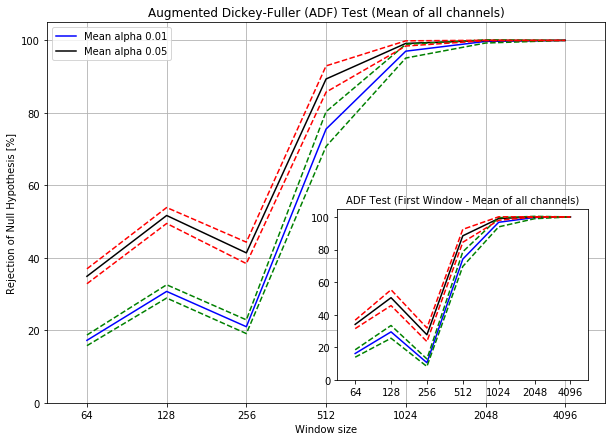

In [179]:
import matplotlib.pyplot as plt

ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

fig, ax1 = plt.subplots()

plt.rcParams['figure.figsize'] = [10, 7]

ax1.plot(ticks, np.mean(np.array(adf_y),axis=1)*100, color='blue');
ax1.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100, color='black');
ax1.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 - np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
ax1.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 + np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
ax1.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 - np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
ax1.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 + np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
ax1.axis([-0.5, 6.5, 0, 105])
ax1.set_xlabel('Window size', fontsize=10);
ax1.set_ylabel('Rejection of Null Hypothesis [%]', fontsize=10);
ax1.set_xticks(ticks);
ax1.set_xticklabels(labels);
ax1.set_title('Augmented Dickey-Fuller (ADF) Test (Mean of all channels)');
ax1.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.52,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 - np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 + np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 - np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 + np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of all channels)', fontsize=10);

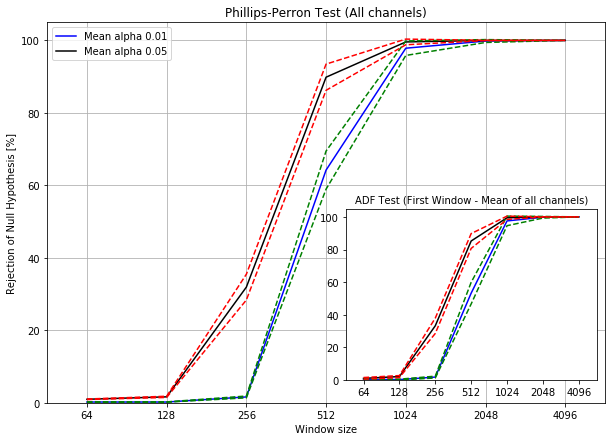

In [180]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 - np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 + np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 - np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 + np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Phillips-Perron Test (All channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.535,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 - np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 + np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 - np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 + np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of all channels)', fontsize=10);

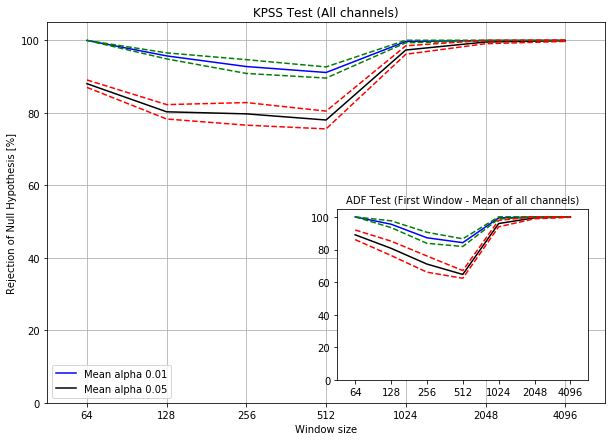

In [181]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 - np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 + np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 - np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 + np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('KPSS Test (All channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.52,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 - np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 + np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 - np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 + np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of all channels)', fontsize=10);

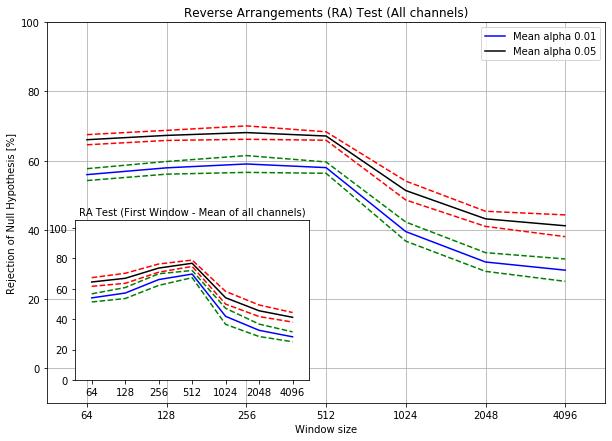

In [182]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 - np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 + np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 - np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 + np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, -10, 100])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Reverse Arrangements (RA) Test (All channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.06,0.42,0.42])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 - np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 + np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 - np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 + np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('RA Test (First Window - Mean of all channels)', fontsize=10);

# Golden electrodes

Testing only some chosen electrodes (C3, C4, T3, T4 e Cz)

In [145]:
eletrodos_golden = [1,5,9,13,17]   # T3, C3, T4, C4 e Cz

adf_y = data2plot(results_ADF, electrodes=eletrodos_golden)
kpss_y = data2plot(results_KPSS, electrodes=eletrodos_golden)
ra_y = data2plot(results_RA, electrodes=eletrodos_golden)
pp_y = data2plot(results_PP, electrodes=eletrodos_golden)

adf_y005 = data2plot(results_ADF_005, electrodes=eletrodos_golden)
kpss_y005 = data2plot(results_KPSS_005, electrodes=eletrodos_golden)
ra_y005 = data2plot(results_RA_005, electrodes=eletrodos_golden)
pp_y005 = data2plot(results_PP_005, electrodes=eletrodos_golden)

Only first window counted

In [146]:
eletrodos_golden = [1,5,9,13,17]   # T3, C3, T4, C4 e Cz

adf_y1st = data2plot(results_ADF, nwindows=1, electrodes=eletrodos_golden)
kpss_y1st = data2plot(results_KPSS, nwindows=1, electrodes=eletrodos_golden)
ra_y1st = data2plot(results_RA, nwindows=1, electrodes=eletrodos_golden)
pp_y1st = data2plot(results_PP, nwindows=1, electrodes=eletrodos_golden)

adf_y1st_005 = data2plot(results_ADF_005, nwindows=1, electrodes=eletrodos_golden)
kpss_y1st_005 = data2plot(results_KPSS_005, nwindows=1, electrodes=eletrodos_golden)
ra_y1st_005 = data2plot(results_RA_005, nwindows=1, electrodes=eletrodos_golden)
pp_y1st_005 = data2plot(results_PP_005, nwindows=1, electrodes=eletrodos_golden)

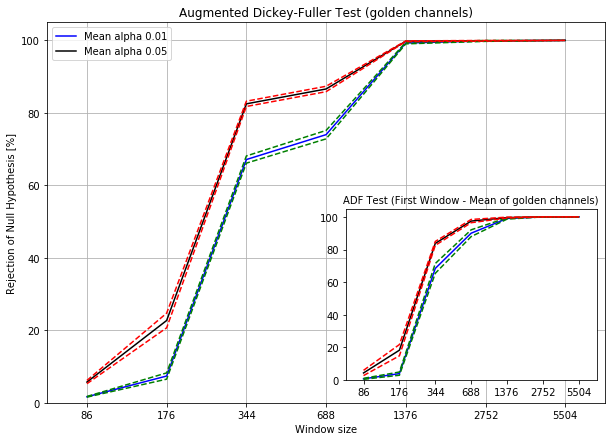

In [148]:
import matplotlib.pyplot as plt

ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 - np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 + np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 - np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 + np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size', fontsize=10);
plt.ylabel('Rejection of Null Hypothesis [%]', fontsize=10);
plt.xticks(ticks, labels);
plt.title('Augmented Dickey-Fuller Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.535,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 - np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 + np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 - np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 + np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of golden channels)', fontsize=10);

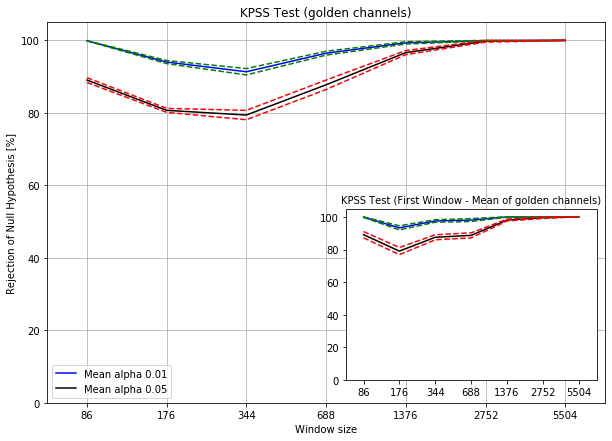

In [149]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 - np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 + np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 - np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 + np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('KPSS Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.535,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 - np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 + np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 - np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 + np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('KPSS Test (First Window - Mean of golden channels)', fontsize=10);

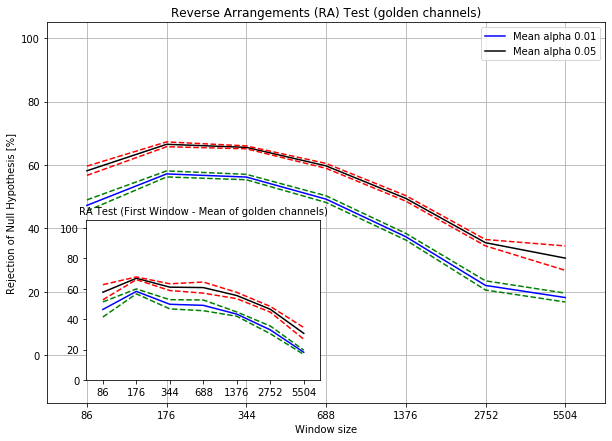

In [151]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 - np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 + np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 - np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 + np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, -15, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Reverse Arrangements (RA) Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.07,0.06,0.42,0.42])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 - np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 + np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 - np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 + np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('RA Test (First Window - Mean of golden channels)', fontsize=10);

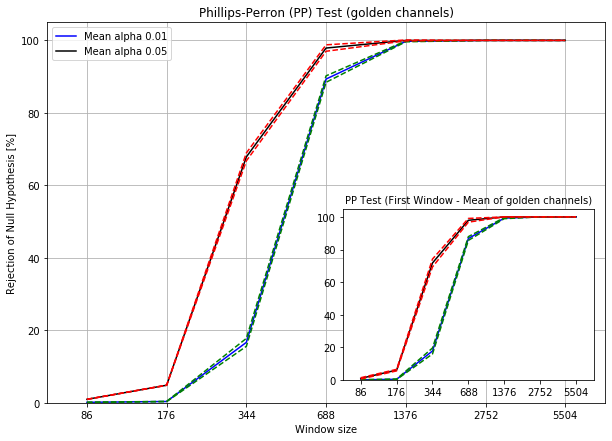

In [152]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_PP.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 - np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 + np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 - np.std(np.array(pp_y),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 + np.std(np.array(pp_y),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Phillips-Perron (PP) Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.53,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 - np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 + np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 - np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 + np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('PP Test (First Window - Mean of golden channels)', fontsize=10);

# ANALYSIS USING DIVISIONS OF 5504 POINTS

# Augmented Dicken-Fuller Test

Rejecting the null hypothesis means series has no unit root (which is the same as be stationary). Test dividing the complete signal into windows (starting with 5504 points and dividing by two each iteration) and checking the stationarity for each window

In [73]:
def adf_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = adfuller(exam[:,channel])
                
        if result[0] < result[4]['1%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_ADF = Parallel(n_jobs=6)(delayed(adf_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_ADF
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_ADF_winsize5504')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [10]:
def adf_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = adfuller(exam[:,channel])
                
        if result[0] < result[4]['5%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_ADF = Parallel(n_jobs=6)(delayed(adf_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_ADF
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_ADF_winsize5504_005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Phillips-Perron Test

Rejecting the null hypothesis means the series has no unit root (which is the same as being stationary). Test dividing the complete signal into windows (starting with 64 points and doubling the value each iteration) and checking the stationarity for each window

In [142]:
def pp_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = PhillipsPerron(exam[:,channel])
                
        if result.stat < result.critical_values['1%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_PP = Parallel(n_jobs=6)(delayed(pp_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_PP
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_PP_winsize5504')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [11]:
def pp_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = PhillipsPerron(exam[:,channel])
                
        if result.stat < result.critical_values['5%']:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_PP = Parallel(n_jobs=6)(delayed(pp_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_PP
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_PP_winsize5504_005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Kwiatkowski-Phillips-Schmidt-Shin test

Rejecting the null hypothesis means that the series is not stationary. Test done by dividing the signal into windows (starting with 64 points and doubling the value each iteration) and checking the stationarity for each window

In [234]:
def kpss_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = kpss(exam[:,channel])
                
        if result[1] > 0.01:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_KPSS = Parallel(n_jobs=6)(delayed(kpss_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_KPSS
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_KPSS_winsize5504')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [12]:
def kpss_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = kpss(exam[:,channel])
                
        if result[1] > 0.05:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
    
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_KPSS = Parallel(n_jobs=6)(delayed(kpss_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_KPSS
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_KPSS_winsize5504_005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Reverse Arrangements Test

Rejecting the null hypothesis means that the series not stationaty, with the observations not being independent from one another and the possibility of an existing trend in this same series

In [74]:
from stats_tests.ra_test import ra

def ra_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = ra(exam[:,channel])
        
        if result[0] <= result[2]['1%'][0] or result[0] >= result[2]['1%'][1]:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
        
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_RA = Parallel(n_jobs=6)(delayed(ra_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_RA
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_RA_winsize5504')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

In [13]:
from stats_tests.ra_test import ra

def ra_exam(exam):
    results_channels = np.zeros(exam.shape[1])
        
    for channel in range(exam.shape[1]):
        result = ra(exam[:,channel])
        
        if result[0] <= result[2]['5%'][0] or result[0] >= result[2]['5%'][1]:
            results_channels[channel] = 1
            
    return results_channels


results_win_sizes = {}

windows_sizes = [86,176,344,688,1376,2752,5504]

for win_size in windows_sizes:
        
    results_wins = {}
        
    for ind_win in range(0, int(exames.shape[1]/win_size)):
        
        results_RA = Parallel(n_jobs=6)(delayed(ra_exam)(exam) \
                                         for exam in exames[:,ind_win*win_size:(ind_win+1)*win_size,:])
    
        results_wins[ind_win+1] = results_RA
        
        print('%d janelas concluidas' % (ind_win+1))
        
    results_win_sizes[win_size] = results_wins
    
    print('%d pontos tamanho de janela' % win_size)
    
    dump(results_win_sizes, 'results_RA_winsize5504_005')

1 janelas concluidas
2 janelas concluidas
3 janelas concluidas
4 janelas concluidas
5 janelas concluidas
6 janelas concluidas
7 janelas concluidas
8 janelas concluidas
9 janelas concluidas
10 janelas concluidas
11 janelas concluidas
12 janelas concluidas
13 janelas concluidas
14 janelas concluidas
15 janelas concluidas
16 janelas concluidas
17 janelas concluidas
18 janelas concluidas
19 janelas concluidas
20 janelas concluidas
21 janelas concluidas
22 janelas concluidas
23 janelas concluidas
24 janelas concluidas
25 janelas concluidas
26 janelas concluidas
27 janelas concluidas
28 janelas concluidas
29 janelas concluidas
30 janelas concluidas
31 janelas concluidas
32 janelas concluidas
33 janelas concluidas
34 janelas concluidas
35 janelas concluidas
36 janelas concluidas
37 janelas concluidas
38 janelas concluidas
39 janelas concluidas
40 janelas concluidas
41 janelas concluidas
42 janelas concluidas
43 janelas concluidas
44 janelas concluidas
45 janelas concluidas
46 janelas concluid

# Evaluating Results of Tests Applied

In [153]:
from joblib import load

results_ADF = load('results_ADF_winsize5504')
results_ADF_005 = load('results_ADF_winsize5504_005')

results_KPSS = load('results_KPSS_winsize5504')
results_KPSS_005 = load('results_KPSS_winsize5504_005')

results_RA = load('results_RA_winsize5504')
results_RA_005 = load('results_RA_winsize5504_005')

results_PP = load('results_PP_winsize5504')
results_PP_005 = load('results_PP_winsize5504_005')

In [154]:
print(results_ADF.keys())
print(results_ADF_005.keys())
print(results_KPSS.keys())
print(results_KPSS_005.keys())
print(results_RA.keys())
print(results_RA_005.keys())
print(results_PP.keys())
print(results_PP_005.keys())

dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])
dict_keys([86, 176, 344, 688, 1376, 2752, 5504])


In [155]:
results_ADF[86].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [156]:
np.sum(results_ADF[86][1], axis=0)

array([1., 1., 5., 2., 0., 1., 8., 3., 2., 3., 3., 5., 0., 2., 3., 2., 0.,
       3., 2.])

In [157]:
len(results_ADF[86][1])

288

# All electrodes

Plotting graph for all windows of all electrodes, showing the mean and standard deviation for every window sizes

In [160]:
adf_y = data2plot(results_ADF)
kpss_y = data2plot(results_KPSS)
ra_y = data2plot(results_RA)
pp_y = data2plot(results_PP)
adf_y005 = data2plot(results_ADF_005)
kpss_y005 = data2plot(results_KPSS_005)
ra_y005 = data2plot(results_RA_005)
pp_y005 = data2plot(results_PP_005)

adf_y1st = data2plot(results_ADF, nwindows=1)
kpss_y1st = data2plot(results_KPSS, nwindows=1)
ra_y1st = data2plot(results_RA, nwindows=1)
pp_y1st = data2plot(results_PP, nwindows=1)
adf_y1st_005 = data2plot(results_ADF_005, nwindows=1)
kpss_y1st_005 = data2plot(results_KPSS_005, nwindows=1)
ra_y1st_005 = data2plot(results_RA_005, nwindows=1)
pp_y1st_005 = data2plot(results_PP_005, nwindows=1)

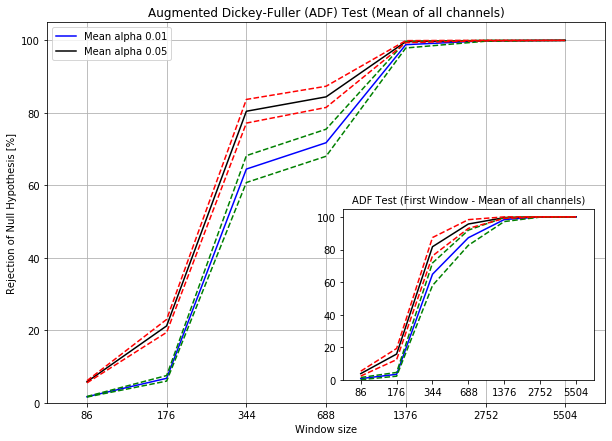

In [161]:
import matplotlib.pyplot as plt

ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 - np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 + np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 - np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 + np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size', fontsize=10);
plt.ylabel('Rejection of Null Hypothesis [%]', fontsize=10);
plt.xticks(ticks, labels);
plt.title('Augmented Dickey-Fuller (ADF) Test (Mean of all channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.53,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 - np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 + np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 - np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 + np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of all channels)', fontsize=10);

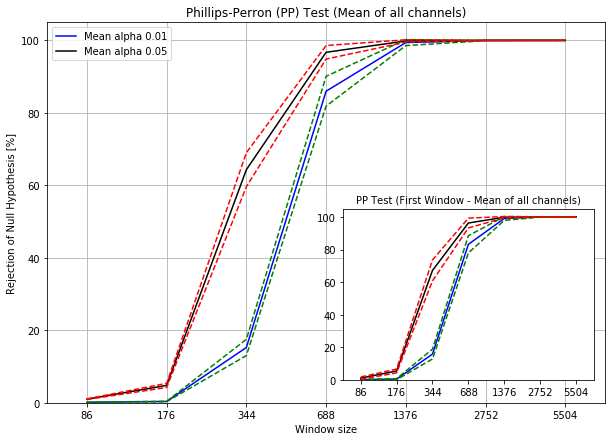

In [162]:
labels = np.array([item for item in results_ADF.keys()])
ticks = [i for i in range(7)]

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 - np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 + np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 - np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 + np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size', fontsize=10);
plt.ylabel('Rejection of Null Hypothesis [%]', fontsize=10);
plt.xticks(ticks, labels);
plt.title('Phillips-Perron (PP) Test (Mean of all channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.53,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 - np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 + np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 - np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 + np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('PP Test (First Window - Mean of all channels)', fontsize=10);

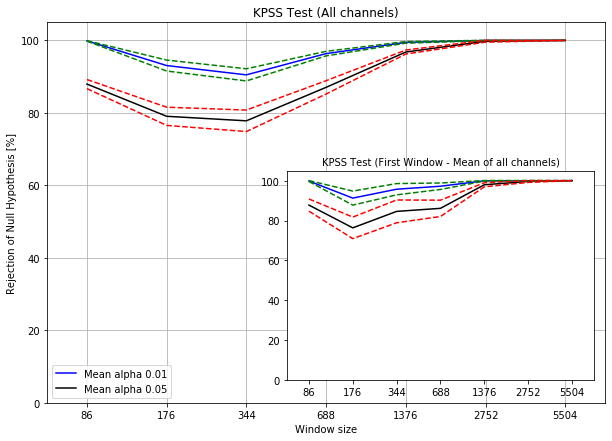

In [164]:
plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 - np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 + np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 - np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 + np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('KPSS Test (All channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.43,0.06,0.55,0.55])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 - np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 + np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 - np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 + np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('KPSS Test (First Window - Mean of all channels)', fontsize=10);

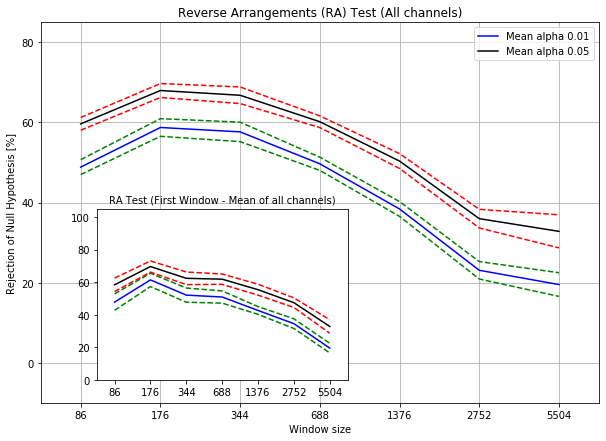

In [165]:
plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 - np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 + np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 - np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 + np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, -10, 85])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Reverse Arrangements (RA) Test (All channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.1,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 - np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 + np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 - np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 + np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('RA Test (First Window - Mean of all channels)', fontsize=10);

# Golden electrodes

Testing only some chosen electrodes (C3, C4, T3, T4 e Cz)

In [166]:
eletrodos_golden = [1,5,9,13,17]   # T3, C3, T4, C4 e Cz

adf_y = data2plot(results_ADF, electrodes=eletrodos_golden)
kpss_y = data2plot(results_KPSS, electrodes=eletrodos_golden)
ra_y = data2plot(results_RA, electrodes=eletrodos_golden)
pp_y = data2plot(results_PP, electrodes=eletrodos_golden)
adf_y005 = data2plot(results_ADF_005, electrodes=eletrodos_golden)
kpss_y005 = data2plot(results_KPSS_005, electrodes=eletrodos_golden)
ra_y005 = data2plot(results_RA_005, electrodes=eletrodos_golden)
pp_y005 = data2plot(results_PP_005, electrodes=eletrodos_golden)

adf_y1st = data2plot(results_ADF, nwindows=1, electrodes=eletrodos_golden)
kpss_y1st = data2plot(results_KPSS, nwindows=1, electrodes=eletrodos_golden)
ra_y1st = data2plot(results_RA, nwindows=1, electrodes=eletrodos_golden)
pp_y1st = data2plot(results_PP, nwindows=1, electrodes=eletrodos_golden)
adf_y1st_005 = data2plot(results_ADF_005, nwindows=1, electrodes=eletrodos_golden)
kpss_y1st_005 = data2plot(results_KPSS_005, nwindows=1, electrodes=eletrodos_golden)
ra_y1st_005 = data2plot(results_RA_005, nwindows=1, electrodes=eletrodos_golden)
pp_y1st_005 = data2plot(results_PP_005, nwindows=1, electrodes=eletrodos_golden)

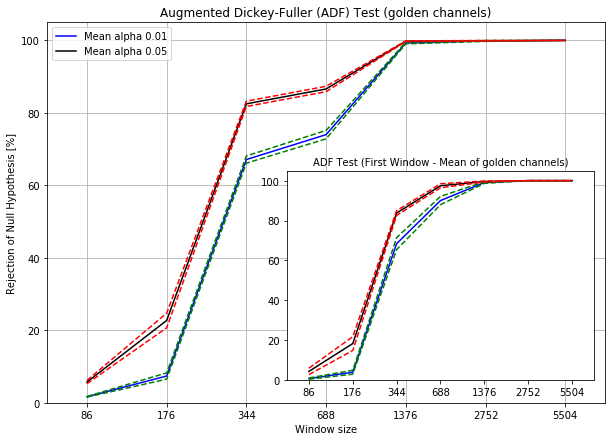

In [167]:
import matplotlib.pyplot as plt

ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 - np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y),axis=1)*100 + np.std(np.array(adf_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 - np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(adf_y005),axis=1)*100 + np.std(np.array(adf_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size', fontsize=10);
plt.ylabel('Rejection of Null Hypothesis [%]', fontsize=10);
plt.xticks(ticks, labels);
plt.title('Augmented Dickey-Fuller (ADF) Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.43,0.06,0.55,0.55])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 - np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st),axis=1)*100 + np.std(np.array(adf_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 - np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(adf_y1st_005),axis=1)*100 + np.std(np.array(adf_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('ADF Test (First Window - Mean of golden channels)', fontsize=10);

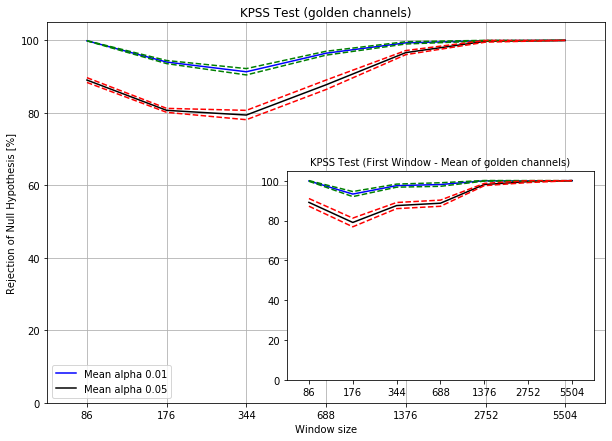

In [168]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 - np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y),axis=1)*100 + np.std(np.array(kpss_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 - np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(kpss_y005),axis=1)*100 + np.std(np.array(kpss_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('KPSS Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.43,0.06,0.55,0.55])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 - np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st),axis=1)*100 + np.std(np.array(kpss_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 - np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(kpss_y1st_005),axis=1)*100 + np.std(np.array(kpss_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('KPSS Test (First Window - Mean of golden channels)', fontsize=10);

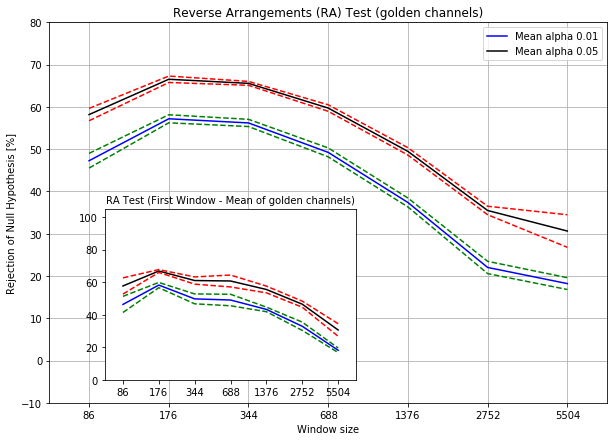

In [169]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 - np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y),axis=1)*100 + np.std(np.array(ra_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 - np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(ra_y005),axis=1)*100 + np.std(np.array(ra_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, -10, 80])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Reverse Arrangements (RA) Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.1,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 - np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st),axis=1)*100 + np.std(np.array(ra_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 - np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(ra_y1st_005),axis=1)*100 + np.std(np.array(ra_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('RA Test (First Window - Mean of golden channels)', fontsize=10);

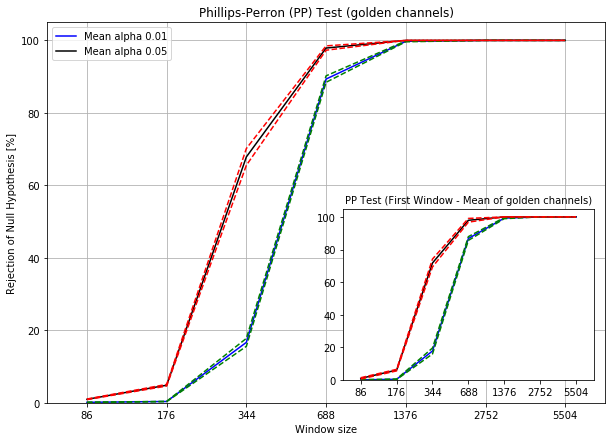

In [170]:
ticks = [0,1,2,3,4,5,6]
labels = np.array([item for item in results_ADF.keys()])

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100, color='blue');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100, color='black');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 - np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y),axis=1)*100 + np.std(np.array(pp_y),axis=1)*100, color='green', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 - np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.plot(ticks, np.mean(np.array(pp_y005),axis=1)*100 + np.std(np.array(pp_y005),axis=1)*100, color='red', linestyle='--');
plt.axis([-0.5, 6.5, 0, 105])
plt.xlabel('Window size');
plt.ylabel('Rejection of Null Hypothesis [%]');
plt.xticks(ticks, labels);
plt.title('Phillips-Perron (PP) Test (golden channels)');
plt.legend(['Mean alpha 0.01', 'Mean alpha 0.05']);
plt.grid(True)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.53,0.06,0.45,0.45])
ax2.set_axes_locator(ip)
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100, color='blue');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100, color='black');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 - np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st),axis=1)*100 + np.std(np.array(pp_y1st),axis=1)*100, color='green', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 - np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.plot(ticks, np.mean(np.array(pp_y1st_005),axis=1)*100 + np.std(np.array(pp_y1st_005),axis=1)*100, color='red', linestyle='--');
ax2.axis([-0.5, 6.5, 0, 105]);
ax2.set_xticks(ticks);
ax2.set_xticklabels(labels);
ax2.set_title('PP Test (First Window - Mean of golden channels)', fontsize=10);